In [1]:
import pandas as pd
import seaborn as sns
import datetime

C:\Users\isunn\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("train.csv", low_memory=False)
test_data = pd.read_csv("test.csv", low_memory=False)
store_data = pd.read_csv("store.csv", low_memory=False)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
percent_missing = (train_data.isna().sum() / len(train_data)) * 100
percent_missing
#There is no missing data in the train df. Hence we can proceed with eda and analysis

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [5]:
#checking the data types
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
train_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [7]:
train_data.shape

(1017209, 9)

In [8]:
#Looking at the unique values in each of the columns
unq_cols = train_data[["Open", "Promo", "StateHoliday", "SchoolHoliday"]]

unq_cols.apply(lambda col: print(f"{col.name}: {col.unique()}"))


Open: [1 0]
Promo: [1 0]
StateHoliday: ['0' 'a' 'b' 'c']
SchoolHoliday: [1 0]


Open             None
Promo            None
StateHoliday     None
SchoolHoliday    None
dtype: object

In [9]:
#Reading the store csv which has more info about the stores
store_df = pd.read_csv("store.csv", low_memory=False)

In [10]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [11]:
store_df.shape

(1115, 10)

In [12]:
train_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [13]:
#The column OPEN describes whether the store is open or close. If the store is closed there are obviously no sales. Seperating the
#days when the store is open and closed and getting rid of data where store is closed

In [14]:
train_data_closed = train_data[train_data["Open"]== 0]

In [15]:
train_data_open = train_data[train_data["Open"]==1]

In [16]:
print(f"Total days recorded: {len(train_data)}")
print(f"Days open: {len(train_data_open)}")
print(f"Days closed: {len(train_data_closed)}")

Total days recorded: 1017209
Days open: 844392
Days closed: 172817


In [17]:
train_data_closed.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
291     292          5  2015-07-31      0          0     0      1   
875     876          5  2015-07-31      0          0     0      1   
1406    292          4  2015-07-30      0          0     0      1   
1990    876          4  2015-07-30      0          0     0      1   
2521    292          3  2015-07-29      0          0     0      1   

     StateHoliday  SchoolHoliday  
291             0              1  
875             0              1  
1406            0              1  
1990            0              1  
2521            0              1

In [18]:
train_data = train_data[train_data["Open"] == 1] #SUbsetting the df with only data from when the store is open

In [19]:
train_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [20]:
train_data.drop(["Open"], axis=1, inplace=True) #Dropping the column OPEN as the dataset is now only the days when store is open

In [21]:
train_data.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [22]:
#checking for missing values
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [23]:
train_data.shape

(844392, 8)

In [24]:
store_data.shape

(1115, 10)

In [25]:
#Getting back to the store data
store_percent_missing = (store_data.isna().sum() / len(store_data)) * 100
store_percent_missing

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [26]:
#There is alot of missing data in the store dataframe. 
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [27]:
store_data["CompetitionDistance"].describe() #The missing values in competition distance can be replaced with the mean of the col

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [28]:
store_data["CompetitionDistance"].fillna(store_data["CompetitionDistance"].mean(),inplace=True)

In [30]:
cols_with0 = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
store_data[cols_with0] = store_data[cols_with0].fillna(0)


In [31]:
store_data.isna().sum() # No more null values in store data

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [32]:
#Merging store data and train data
sales_data_final = pd.merge(train_data,store_data, how="inner", on="Store")

In [33]:
sales_data_final.shape

(844392, 17)

In [34]:
sales_data_final.info() #This is the final data set which will be used for the analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

In [35]:
sales_data_final.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0  
1              0.0              0.0             0  
2              0.0              0.0             0  
3              0.0              0.0             0  
4              0.0              0.0             0

In [36]:
sales_data_final.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [37]:
#Features such as Date,Day and Month can be extracted from the date column.

In [38]:
#Extracting year
sales_data_final['Year'] = pd.DatetimeIndex(sales_data_final['Date']).year

In [39]:
#Extracting month and date
sales_data_final['Month'] = pd.DatetimeIndex(sales_data_final['Date']).month
sales_data_final['Day'] = pd.DatetimeIndex(sales_data_final['Date']).day

In [40]:
sales_data_final.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  
0              0.0              0.0             0  2015      7   31  
1              0.0              0.0             0  2015      7   30  
2              0.0              0.0             0  2015      7   29  
3              0.0              0.0             0  2015      7   28  
4              0.0              0.0             0  2015      7   27

<AxesSubplot:>

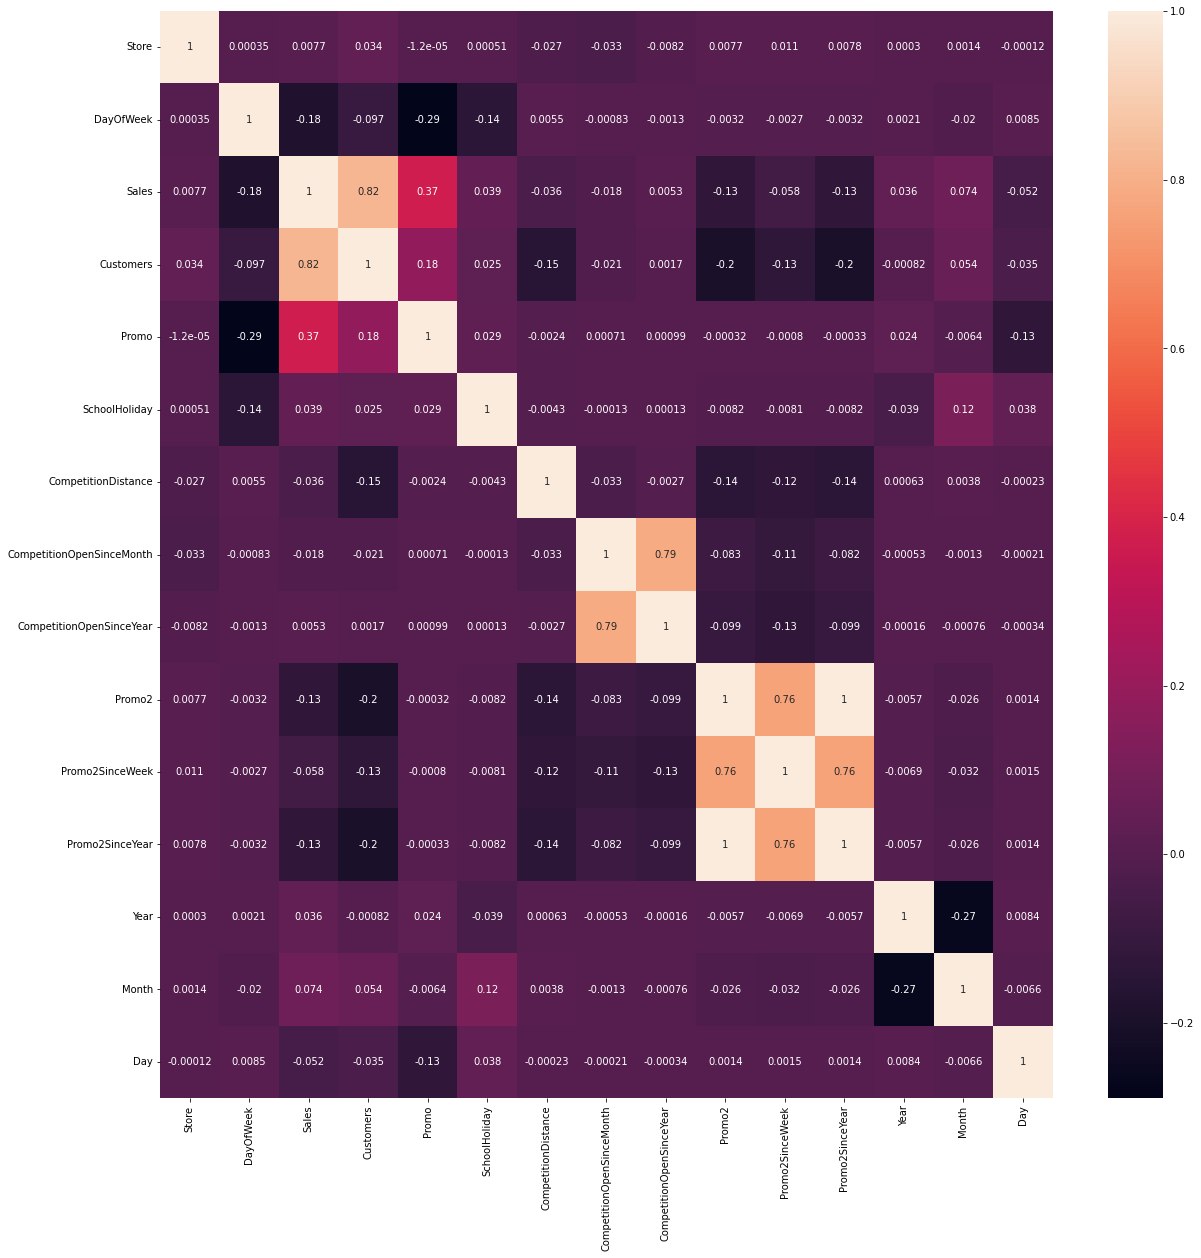

In [41]:
import matplotlib.pyplot as plt
correlations = sales_data_final.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [42]:
#Calculating the monthly sales
monthly_sales = sales_data_final.groupby("Month").agg("mean")["Sales"]
monthly_sales
monthly_sales = pd.DataFrame(monthly_sales)
#This shows the highest sales were recorded during the months of Dec as it's the holiday season

In [43]:
monthly_sales

Sales
Month             
1      6563.690444
2      6589.165535
3      6976.412026
4      7046.228420
5      7106.453154
6      7000.978190
7      6952.682125
8      6648.984654
9      6546.343035
10     6602.843354
11     7188.554250
12     8608.956661

In [44]:
import plotly.graph_objects as go
# Customizing the x-axis labels with month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales["Sales"],
                         mode='lines+markers',
                         name='Sales'))

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(12)),
        ticktext=month_names,
        tickangle=45
    ),
    xaxis_title="Month",
    yaxis_title="Sale Amount",
    title_text="Monthly Sales"
)

fig.write_html(file='monthly_sales_chart.html')
fig.show()


1.The sales are highest during the months of December across the 3 years. This makes sense as it's a holiday season. The lowest sales were recorded during the months of OCtober and February.


In [45]:
#calculating the average sales per year

yearly_sales = sales_data_final.groupby("Year").agg("mean")["Sales"]
yearly_sales = pd.DataFrame(yearly_sales)
yearly_sales

Sales
Year             
2013  6814.392025
2014  7025.404201
2015  7088.126648

The highest sales were recorded during the year 2015 and the lowest during 2013.
The sales tend to be improving each year


In [46]:
#Extracting the day of the week which can be used to figure out which day of the week do most customers visit.
sales_data_final['Weekday'] =pd.to_datetime(sales_data_final['Date'],errors='coerce').dt.strftime('%A')  
#sales_data_final[['Date','Weekday']].sample(10)

In [47]:
#Looking at the average number of customers and the average sale amount per each day of the week.

grouped_data = sales_data_final.groupby('Weekday')[['Customers', 'Sales']].mean().sort_index()

fig = go.Figure()

# Add the average number of customers trace
fig.add_trace(go.Scatter(x=grouped_data.index,
                         y=grouped_data["Customers"],
                         mode='lines+markers',
                         name='Average Customers',
                         marker=dict(color='red')))

# Add the average sales trace
fig.add_trace(go.Scatter(x=grouped_data.index,
                         y=grouped_data["Sales"],
                         mode='lines+markers',
                         name='Average Sales',
                         marker=dict(color='blue')))

# Set the labels and title
fig.update_layout(
    xaxis_title="Weekday",
    yaxis_title="Value",
    title_text="Average Customers and Sales by Weekday"
)
fig.write_html(file="average customers and average sale amount per each day of the week.html")
fig.show()



This shows us that Sundays is when most customers visit and most sales happen.The least sales happen during saturday.

<AxesSubplot:xlabel='Weekday', ylabel='count'>

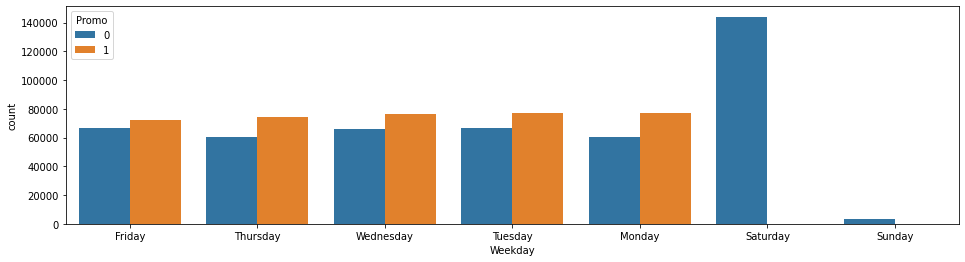

In [48]:


fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Weekday',hue='Promo',data=sales_data_final)

C:\Users\isunn\AppData\Local\Temp/ipykernel_5888/4208098617.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='StoreType'>

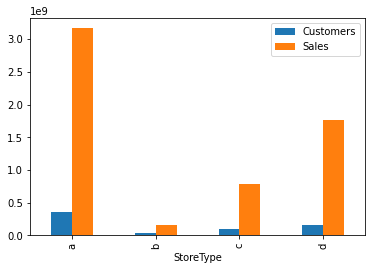

In [49]:
data_by_storetype = sales_data_final.groupby('StoreType')['Customers', 'Sales'].sum()
data_by_storetype.plot(kind="bar")

In [50]:
import plotly.express as px
from matplotlib.lines import Line2D
high_sale_store=sales_data_final.groupby('Store')[['Sales']].mean()
fig=px.line(high_sale_store,x=high_sale_store.index,y='Sales',title='Average Store Sales',markers=True)
fig.write_html(file="Avg store sales.html")
fig.show()

In [51]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sales_data_final.groupby('Store').agg({'Customers': 'max'})['Customers'].nlargest(10).plot.bar()
plt.xlabel('Store Number')
plt.ylabel(' Max Customer Number')

Text(0, 0.5, ' Max Customer Number')

In [52]:
import plotly.express as px

top_10_sales_by_year = sales_data_final.groupby('Year').agg({'Sales': 'mean'}).nlargest(10, 'Sales')

fig = px.bar(top_10_sales_by_year, x=top_10_sales_by_year.index, y='Sales', title='Avg Sales Per Year')
fig.update_layout(yaxis_title='Sales')

fig.update_xaxes(
    type='category',
    tickvals=top_10_sales_by_year.index,
    ticktext=top_10_sales_by_year.index
)

fig.write_html(file="avg sales per year.html")
fig.show()


In [53]:
Customers_per_year = sales_data_final.groupby('Year').agg({'Customers': 'mean'})

fig = px.bar(Customers_per_year, x=Customers_per_year.index, y='Customers', title='Customers per year')
fig.update_layout(yaxis_title='Customers')

fig.update_xaxes(
    type='category',
    tickvals=top_10_sales_by_year.index,
    ticktext=top_10_sales_by_year.index
)
fig.write_html("Avg number of customers per year.html")
fig.show()

In [54]:
#sales_data_final.columns

In [55]:
sales_per_month = sales_data_final.groupby("Month")[["Sales"]].mean()
fig = px.line(sales_per_month,x=sales_per_month.index,y="Sales",title="Average Sale Value Per Month", markers=True)
fig.write_html(file="Avg monthly sales.html")
fig.show()

In [56]:
customers_per_month = sales_data_final.groupby("Month")[["Customers"]].mean()
fig = px.line(customers_per_month,x=customers_per_month.index,y="Customers",title="Avg customers per month",markers=True)
fig.write_html(file = "Avg number of customers per month.html")
fig.show()

In [57]:
#customers per store
customers_per_store = sales_data_final.groupby("Store")[["Customers"]].mean()
fig=px.line(customers_per_store,x=customers_per_store.index,y="Customers",title="Avg Customers per Store",markers=True)
fig.write_html(file="Avg number of customers per each store.html")
fig.show()

1.Most people tend to be going shopping at the end of the month (30th,31st) or during the first week of the month.

In [58]:
#Plotting the avg customers and sales per week days.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with two rows and one column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Group by Day and calculate the average sales and customers
each_day_sales = sales_data_final.groupby("Day")[["Sales"]].mean()
each_day_customers = sales_data_final.groupby("Day")[["Customers"]].mean()

# Create the first trace (average sales per day)
trace1 = go.Scatter(x=each_day_sales.index, y=each_day_sales["Sales"], mode='lines+markers', name='Avg Sales')

# Create the second trace (average customers per day)
trace2 = go.Scatter(x=each_day_customers.index, y=each_day_customers["Customers"], mode='lines+markers', name='Avg Customers')

# Add both traces to the subplot
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# Update the layout of the subplot
fig.update_layout(
    title_text="Average Sales and Customers per Day",
    xaxis=dict(title="Day"),
    yaxis=dict(title="Average Value"),
    showlegend=True,
    height=600,
    width=800
)

# Save the combined chart as an HTML file
fig.write_html(file="Combined_Average_Sales_and_Customers.html")

# Show the combined chart
fig.show()

In [59]:
#Looking at the effect of Promo and Promo2 on the sales

promo_data = sales_data_final.groupby("Promo")[["Sales"]].mean()

promo2_data = sales_data_final.groupby("Promo2")[["Sales"]].mean()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=["No Promo", "Promo"],
    y=promo_data["Sales"],
    name="Promo",
    marker=dict(color="blue")
))

fig.add_trace(go.Bar(
    x=["No Promo2", "Promo2"],
    y=promo2_data["Sales"],
    name="Promo2",
    marker=dict(color="green")
))


fig.update_layout(
    xaxis_title="Promo",
    yaxis_title="Average Sales",
    title_text="Average Sales by Promo and Promo2"
)
fig.write_html("Impact of promotions on sales.html")
fig.show()

Promo has a considerable effect on sales as it has improved the sales by 38% where as the Promo2 had a negative effect on the sales.

In [60]:
percentage_improvement = (promo_data.loc[1, "Sales"] - promo_data.loc[0, "Sales"]) / promo_data.loc[0, "Sales"] * 100

percentage_improvement = round(percentage_improvement, 2)  # Round to 2 decimal places

print(f"The percentage of sales improvement due to Promo: {percentage_improvement}%")

The percentage of sales improvement due to Promo: 38.77%


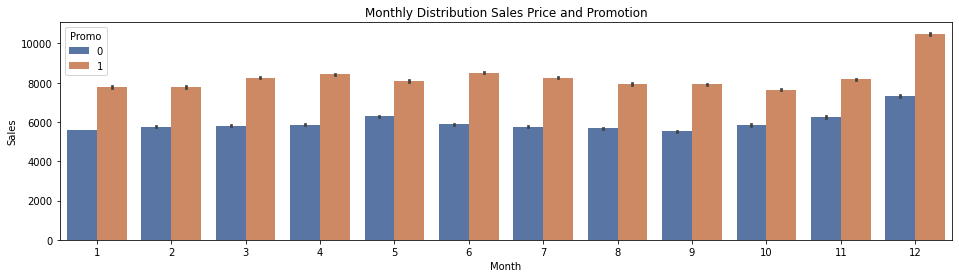

In [61]:
#Plotting the distribution of sales and promotion. 0 indicates sales when there is no promotion and 1 indicates a runnin promotion.
fig_dims = (16, 4)
plt.figure(figsize=fig_dims)

sns.barplot(
    x='Month',
    y='Sales',
    data=sales_data_final,
    palette='deep',
    hue='Promo'
)

plt.title('Monthly Distribution Sales Price and Promotion')
plt.show()

Text(0.5, 1.0, 'Monthly Distribution Sales Price and Promotion2')

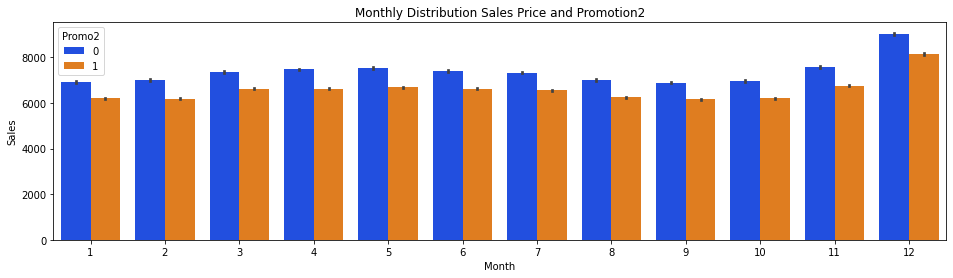

In [62]:
#Plotting the distribution of sales and promotion2. 0 indicates sales when there is no promotion2 and 1 indicates a runnin promotion2.
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(
    x='Month', 
    y='Sales', 
    data=sales_data_final, 
    palette='bright',
    hue='Promo2');
plt.title('Monthly Distribution Sales Price and Promotion2')

#This again confirms that promo2 hasn't improved the sales

In [63]:
#Which store type has more customers and sales
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=sales_data_final['StoreType'],y=sales_data_final['Sales'], ax=axis1)
sns.barplot(x=sales_data_final['StoreType'],y=sales_data_final['Customers'], ax=axis2)

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

The store type B has the most number of customers and sales. The store "D" seems to have the least amount of customers.
Renovation could be focused on making other stores similar to the type "B".

In [64]:
#Sales and customers during state holidays
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=sales_data_final['StateHoliday'],y=sales_data_final['Sales'], ax=axis1)
sns.barplot(x=sales_data_final['StateHoliday'],y=sales_data_final['Customers'], ax=axis2)

<AxesSubplot:xlabel='StateHoliday', ylabel='Customers'>

In [65]:
#Sales and customers during school holidays
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=sales_data_final['SchoolHoliday'],y=sales_data_final['Sales'], ax=axis1)
sns.barplot(x=sales_data_final['SchoolHoliday'],y=sales_data_final['Customers'], ax=axis2)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

In [66]:
sales_data_final["StateHoliday"].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

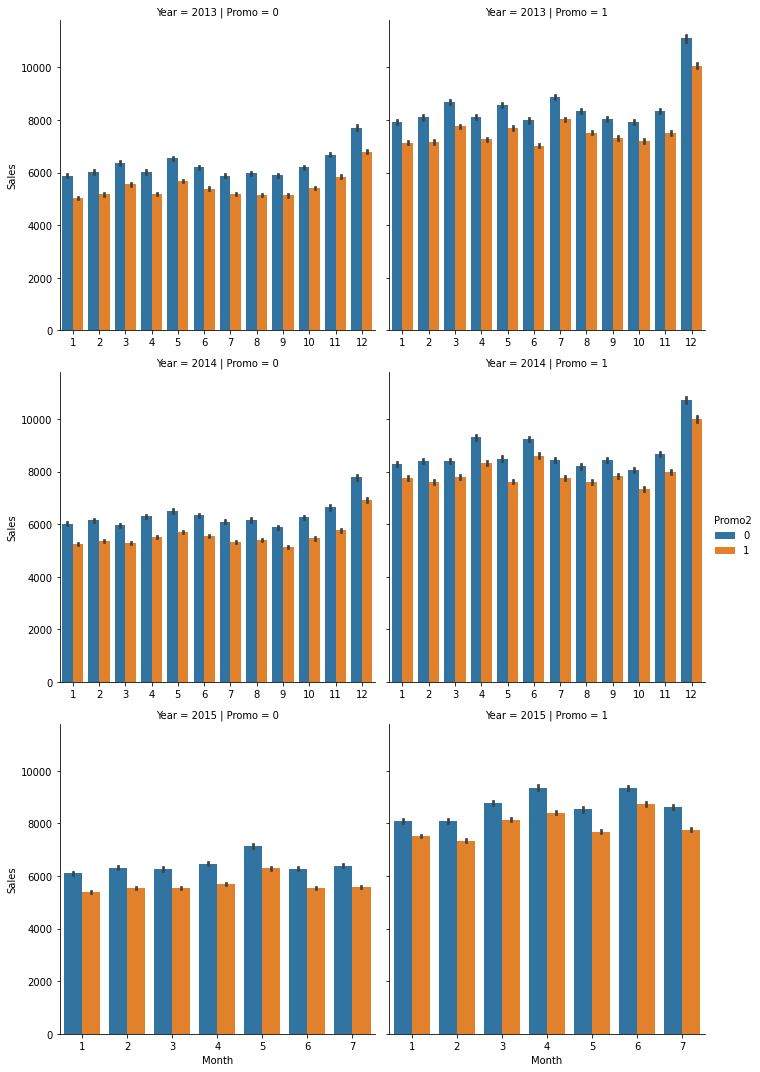

In [67]:
#Effect of promo on the sales per year
import seaborn as sns

sns.catplot(
    data=sales_data_final,
    x="Month",
    y="Sales",
    col='Promo',  # per promo in columns
    hue='Promo2',
    row="Year",
    sharex=False,
    kind='bar'  
)


In [68]:
competition_customers = sales_data_final.copy()
#Creating a dataframe to analyse the effect of competition distance on the stores
#Grouping the competition distance and comparing the customers from those stores
competition_groups =['0-4000','4000-8000','8000-12000','12000-16000','16000-20000','20000-24000']  
bins = [0,4000,8000,12000,16000,20000,24000]

competition_customers = competition_customers.groupby(pd.cut(competition_customers['CompetitionDistance'], bins=bins, labels=competition_groups))['Customers'].sum().fillna(0).reset_index()
competition_stores=store_data[['Store','CompetitionDistance']]
#Comparing the total stores per each competition distance range
competition_stores = competition_stores.groupby(pd.cut(competition_stores['CompetitionDistance'], bins=bins, labels=competition_groups))['Store'].count().fillna(0).reset_index()
competition_stores.head(10)



CompetitionDistance  Store
0              0-4000    704
1           4000-8000    166
2          8000-12000     84
3         12000-16000     53
4         16000-20000     51
5         20000-24000     23

In [69]:
competition_df =pd.merge(competition_customers,competition_stores,on="CompetitionDistance")
#competition_df.head()

In [70]:
#The best metric to analyze how CompetitorDistance is affecting the sales is my measuring the average customer per store at each of these classes of distances
competition_df['Customer/Store'] = competition_df['Customers']/competition_df['Store']
competition_df.head()

CompetitionDistance  Customers  Store  Customer/Store
0              0-4000  439151112    704   623794.193182
1           4000-8000   83229977    166   501385.403614
2          8000-12000   39164235     84   466240.892857
3         12000-16000   25694222     53   484796.641509
4         16000-20000   24696628     51   484247.607843

In [71]:
#Checking how the competition distance effects the number of customers that visit the store

fig = px.bar(competition_df, x='CompetitionDistance', y='Customer/Store', title='Customer per Store by Competition Distance')
fig.write_html("Number of customers per store and the competition distance.html")
fig.show()

In [72]:
#This shows that there are more customers on average where the competition is closer. 

Feature Importance (Correlation to Sales):
Customers                    0.823597
Promo                        0.368145
Month                        0.073600
SchoolHoliday                0.038617
Year                         0.036169
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Day                         -0.051849
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64


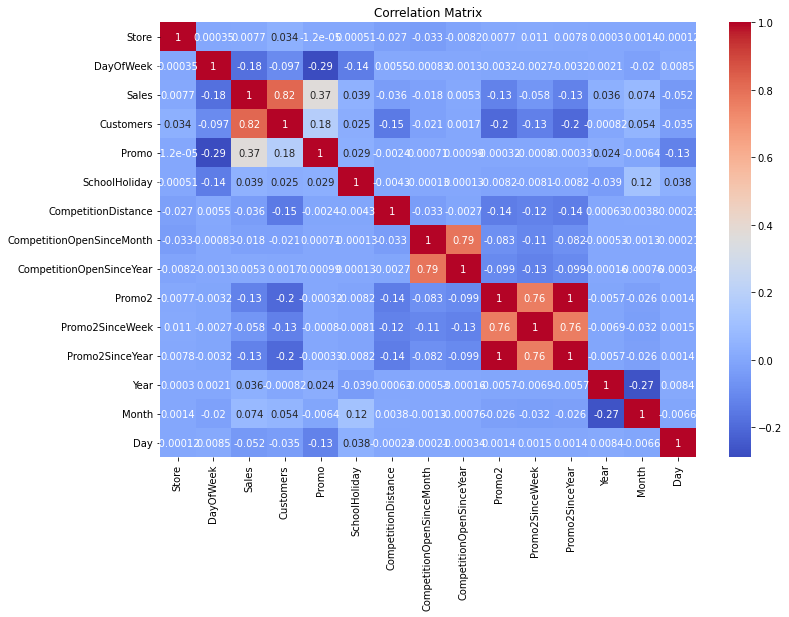

In [73]:
#Identifying the features that have the most effect on sales.
# Calculating the correlation matrix
correlation_matrix = sales_data_final.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Identify the features with the highest correlation to Sales
target_variable = 'Sales'
feature_importance = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

# Print the feature importance
print("Feature Importance (Correlation to Sales):")
print(feature_importance)


In [74]:
feature_importance = pd.DataFrame(feature_importance)
feature_importance

Sales
Customers                  0.823597
Promo                      0.368145
Month                      0.073600
SchoolHoliday              0.038617
Year                       0.036169
Store                      0.007710
CompetitionOpenSinceYear   0.005266
CompetitionOpenSinceMonth -0.018370
CompetitionDistance       -0.036343
Day                       -0.051849
Promo2SinceWeek           -0.058476
Promo2                    -0.127596
Promo2SinceYear           -0.127621
DayOfWeek                 -0.178736

In [76]:
sales_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

In [77]:
sales_data_final.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceMonth  \
0              1         c          a  ...                        9.0   
1              1         c          a  ...                        9.0   
2              1         c          a  ...                        9.0   
3              1         c          a  ...                        9.0   
4              1         c          a  ...                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2008.0       0              0.0              0.0   
2                    2008.0       0              0.0              0.0   
3                    2008.0       0              0.0              0.0   
4                    2008.0       0              0.0              0.0   

   PromoInterval  Year  Month  Day    Weekday  
0              0  2015      7   31     Friday  
1              0  2015      7   30   Thursday  
2              0  2015      7   29  Wednesday  
3              0  2015      7   28    Tuesday  
4              0  2015      7   27     Monday  

[5 rows x 21 columns]

In [79]:
cols_to_keep = ["Customers","CompetitionOpenSinceYear","Day","SchoolHoliday","DayOfWeek","Sales","Promo","StateHoliday","Month"]

In [80]:
df_final = sales_data_final[cols_to_keep]

In [81]:
df_final.head()

Customers  CompetitionOpenSinceYear  Day  SchoolHoliday  DayOfWeek  Sales  \
0        555                    2008.0   31              1          5   5263   
1        546                    2008.0   30              1          4   5020   
2        523                    2008.0   29              1          3   4782   
3        560                    2008.0   28              1          2   5011   
4        612                    2008.0   27              1          1   6102   

   Promo StateHoliday  Month  
0      1            0      7  
1      1            0      7  
2      1            0      7  
3      1            0      7  
4      1            0      7

In [82]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

columns_to_normalize = ['Customers', 'Sales', 'Month']

df_final[columns_to_normalize] = scaler.fit_transform(df_final[columns_to_normalize])


C:\Users\isunn\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df_final.head()

Customers  CompetitionOpenSinceYear  Day  SchoolHoliday  DayOfWeek  \
0   0.075122                    2008.0   31              1          5   
1   0.073904                    2008.0   30              1          4   
2   0.070790                    2008.0   29              1          3   
3   0.075799                    2008.0   28              1          2   
4   0.082837                    2008.0   27              1          1   

      Sales  Promo StateHoliday     Month  
0  0.126664      1            0  0.545455  
1  0.120815      1            0  0.545455  
2  0.115087      1            0  0.545455  
3  0.120599      1            0  0.545455  
4  0.146856      1            0  0.545455

In [84]:
df_final.dtypes

Customers                   float64
CompetitionOpenSinceYear    float64
Day                           int64
SchoolHoliday                 int64
DayOfWeek                     int64
Sales                       float64
Promo                         int64
StateHoliday                 object
Month                       float64
dtype: object

In [85]:
df_final["StateHoliday"].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
ordinal_column = 'StateHoliday'

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the categorical column
df_final[ordinal_column] = label_encoder.fit_transform(df_final[ordinal_column])



C:\Users\isunn\AppData\Local\Temp/ipykernel_5888/2943225540.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
#Importing necessary libraries for the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [88]:
#Preparing the data to feed to the model
X = df_final.drop(columns=['Sales'])  # Features
y = df_final['Sales']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
#lINER REGRESSION MODEL
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"R-squared (R2): {lr_r2}")

print("\n")
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Mean Absolute Error (MAE): 0.02774173778865388
Mean Squared Error (MSE): 0.0015018588515983157
R-squared (R2): 0.7294895566984838


Coefficients: [ 1.07397330e+00  2.88315505e-07  2.92464704e-05  7.99335796e-04
 -1.72920367e-03  3.22370210e-02 -2.81813695e-02  7.74259863e-03]
Intercept: 0.04385975191119684


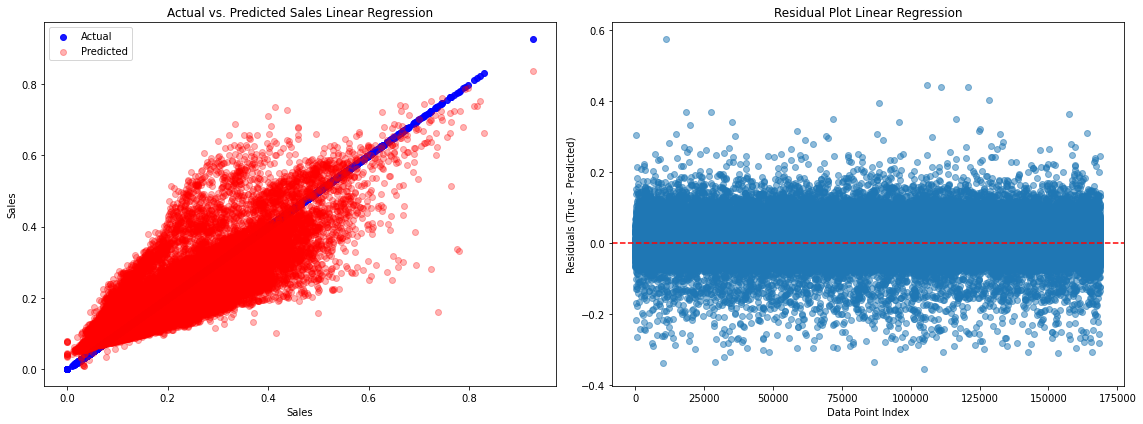

In [90]:
residuals_lr = y_test - y_pred_lr


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot a: Actual vs. Predicted Sales for Linear Regression
axes[0].scatter(y_test, y_test, color='blue', label='Actual', alpha=0.9)
axes[0].scatter(y_test, y_pred_lr, color='red', label='Predicted', alpha=0.3)
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Sales")
axes[0].set_title("Actual vs. Predicted Sales Linear Regression")
axes[0].legend()

# Plot b: Residual Plot for Linear Regression
axes[1].scatter(range(len(residuals_lr)), residuals_lr, alpha=0.5)
axes[1].set_xlabel("Data Point Index")
axes[1].set_ylabel("Residuals (True - Predicted)")
axes[1].set_title("Residual Plot Linear Regression")
axes[1].axhline(0, color='red', linestyle='--')


plt.tight_layout()


plt.show()


In [91]:
#RANDOM FOREST REGRESSOR
features = ['Customers', 'CompetitionOpenSinceYear', 'Day', 'SchoolHoliday', 'DayOfWeek', 'Promo', 'StateHoliday', 'Month']
target = 'Sales'

#Splitting the data
X = df_final[features].values
y = df_final[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Building
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model performance
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R2): {rf_r2}")

Mean Absolute Error (MAE): 0.02537804389843554
Mean Squared Error (MSE): 0.00121005487295822
R-squared (R2): 0.7820484396687928


In [92]:
residuals_rf = y_test - y_pred_rf

#Plotting the performance of the random forest regressor

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot 1: Residual Plot for Random Forest
axes[0].scatter(range(len(residuals_rf)), residuals_rf, alpha=0.5)
axes[0].set_xlabel("Data Point Index")
axes[0].set_ylabel("Residuals (True - Predicted)")
axes[0].set_title("Residual Plot Random Forest")
axes[0].axhline(0, color='red', linestyle='--')

# Plot 2: Actual vs. Predicted Sales for Random Forest
axes[1].scatter(y_test, y_test, color='blue', label='Actual', alpha=0.9)
axes[1].scatter(y_test, y_pred_rf, color='red', label='Predicted', alpha=0.3)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Sales")
axes[1].set_title("Actual vs. Predicted Sales Random Forest")
axes[1].legend()


plt.tight_layout()

plt.show()


In [93]:
#XGBoost Model
x_features = ['Customers', 'CompetitionOpenSinceYear', 'Day', 'SchoolHoliday', 'DayOfWeek', 'Promo', 'StateHoliday', 'Month']
x_target = 'Sales'

# Prepare the data
X = df_final[x_features].values
y = df_final[x_target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the regression objective
    n_estimators=100,             # Number of boosting rounds (trees)
    learning_rate=0.1,            # Learning rate (step size for updates)
    max_depth=3,                  # Maximum depth of each tree
    random_state=42               # Random seed for reproducibility
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [94]:
# Making predictions on the testing data
xgb_y_pred = xgb_model.predict(X_test)


xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"R-squared (R2): {xgb_r2}")

Mean Squared Error (MSE): 0.0011521773591743698
R-squared (R2): 0.7924731689262705


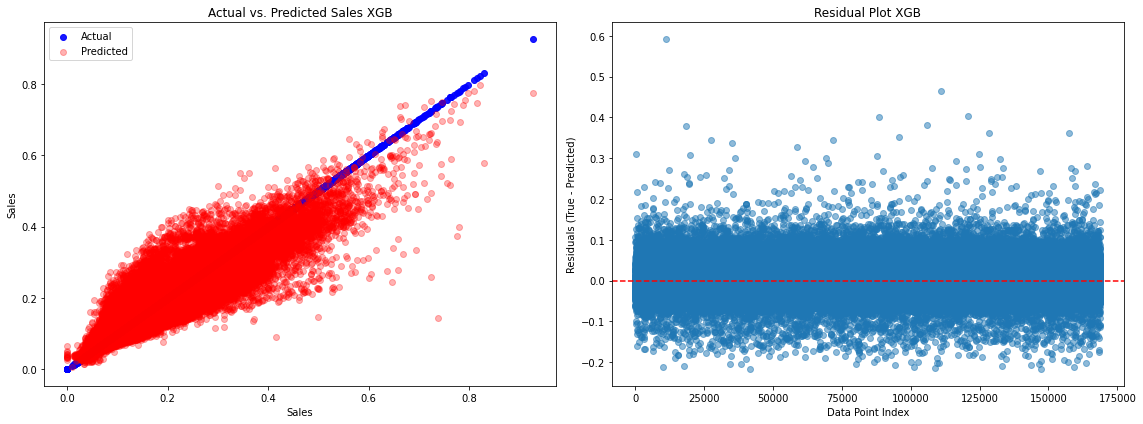

In [95]:
residuals_xgb = y_test - xgb_y_pred
#Plotting the performance of the XGB model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot 1: Actual vs. Predicted Sales
axes[0].scatter(y_test, y_test, color='blue', label='Actual', alpha=0.9)
axes[0].scatter(y_test, xgb_y_pred, color='red', label='Predicted', alpha=0.3)
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Sales")
axes[0].set_title("Actual vs. Predicted Sales XGB")
axes[0].legend()

# Plot 2: Residual Plot
axes[1].scatter(range(len(residuals_xgb)), residuals_xgb, alpha=0.5)
axes[1].set_xlabel("Data Point Index")
axes[1].set_ylabel("Residuals (True - Predicted)")
axes[1].set_title("Residual Plot XGB")
axes[1].axhline(0, color='red', linestyle='--')


plt.tight_layout()


plt.show()
